In [ ]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import skew
import numpy as np
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [ ]:
df = pd.read_csv('./sample_data/monet.csv')

In [ ]:
df.head()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
0,3.993780,21.3,25.6,1,1,1
1,8.800000,31.9,25.6,1,2,2
2,0.131694,6.9,15.9,0,3,3
3,2.037500,25.7,32.0,1,4,2
4,1.487500,25.7,32.0,1,4,2


In [ ]:
df.tail()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
425,5.2825,25.6,39.4,1,375,1
426,9.3525,25.9,39.6,1,375,2
427,8.2525,25.6,39.6,1,375,1
428,3.4100,25.6,39.4,1,386,2
429,1.5425,25.7,32.0,1,387,1


In [ ]:
df.shape

(430, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PRICE    430 non-null    float64
 1   HEIGHT   430 non-null    float64
 2   WIDTH    430 non-null    float64
 3   SIGNED   430 non-null    int64  
 4   PICTURE  430 non-null    int64  
 5   HOUSE    430 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 20.3 KB


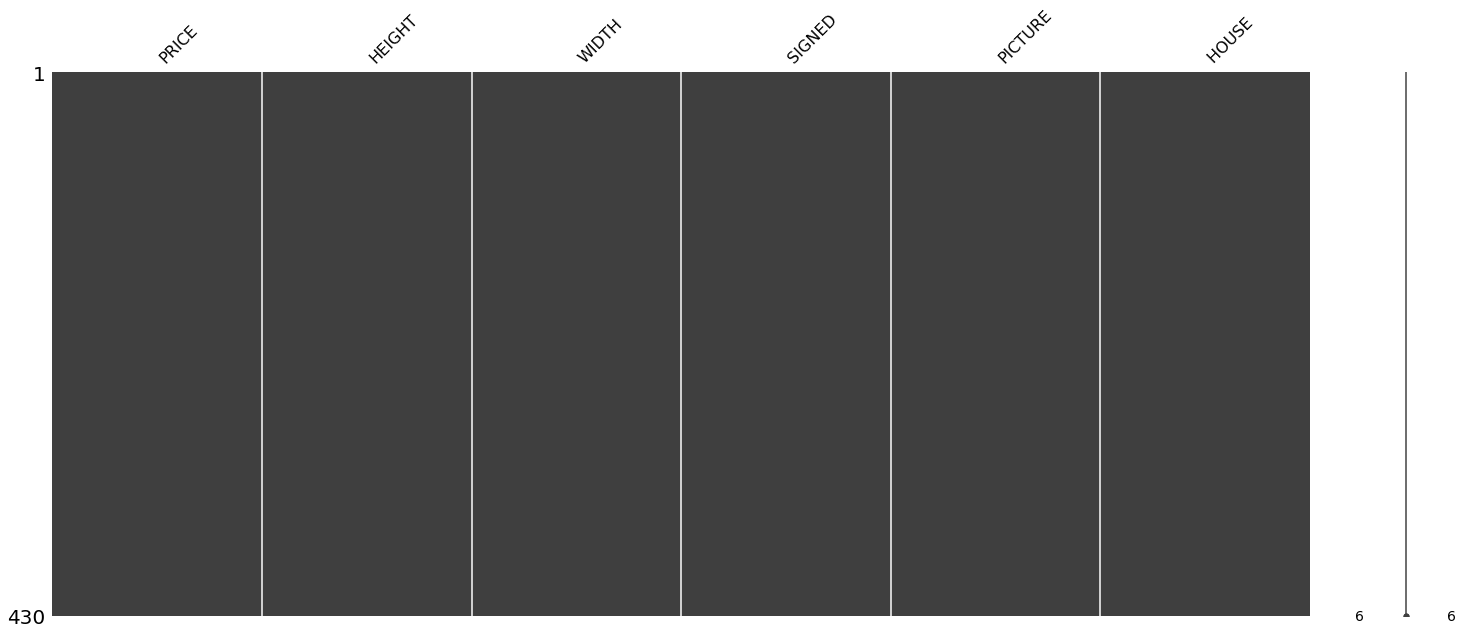

In [ ]:
# Checking missing values in the data set by using msno matrix
msno.matrix(df)

In [ ]:
# Creating size column
df['SIZE'] = df['HEIGHT']*df['WIDTH']

In [ ]:
df.head()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE,SIZE
0,3.993780,21.3,25.6,1,1,1,545.28
1,8.800000,31.9,25.6,1,2,2,816.64
2,0.131694,6.9,15.9,0,3,3,109.71
3,2.037500,25.7,32.0,1,4,2,822.40
4,1.487500,25.7,32.0,1,4,2,822.40


In [ ]:
for column in df.columns:
  if df.dtypes[column] != np.object:
    print(column ,' : ' , skew(df[column], axis=0, bias=True, nan_policy='omit'))


PRICE  :  2.8309820163618893
HEIGHT  :  1.8263892242940685
WIDTH  :  2.048113094558297
SIGNED  :  -1.674080612166068
PICTURE  :  0.07007980158027305
HOUSE   :  0.3733324102363447
SIZE  :  3.8831941413460154


In [ ]:
# Log transform below variables

to_be_transformed = ['PRICE','HEIGHT','WIDTH','SIZE']
df_log = df[to_be_transformed].applymap(lambda x: np.log(x+1))

# rename columns
df_log.columns = 'log_' + df_log.columns

In [ ]:
df_log.skew()

log_PRICE     0.837605
log_HEIGHT   -0.469233
log_WIDTH    -0.590784
log_SIZE     -0.824549
dtype: float64

In [ ]:
df_log

,log_PRICE,log_HEIGHT,log_WIDTH,log_SIZE
0,1.608193,3.104587,3.280911,6.303132
1,2.282382,3.493473,3.280911,6.706422
2,0.123716,2.066863,2.827314,4.706914
3,1.111035,3.284664,3.496508,6.713442
4,0.911278,3.284664,3.496508,6.713442
...,...,...,...,...
425,1.837768,3.280911,3.698830,6.917349
426,2.337228,3.292126,3.703768,6.934047
427,2.224894,3.280911,3.703768,6.922407
428,1.483875,3.280911,3.698830,6.917349


In [ ]:
monet = pd.concat([df,df_log], axis=1)

In [ ]:
monet

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE,SIZE,log_PRICE,log_HEIGHT,log_WIDTH,log_SIZE
0,3.993780,21.3,25.6,1,1,1,545.28,1.608193,3.104587,3.280911,6.303132
1,8.800000,31.9,25.6,1,2,2,816.64,2.282382,3.493473,3.280911,6.706422
2,0.131694,6.9,15.9,0,3,3,109.71,0.123716,2.066863,2.827314,4.706914
3,2.037500,25.7,32.0,1,4,2,822.40,1.111035,3.284664,3.496508,6.713442
4,1.487500,25.7,32.0,1,4,2,822.40,0.911278,3.284664,3.496508,6.713442
...,...,...,...,...,...,...,...,...,...,...,...
425,5.282500,25.6,39.4,1,375,1,1008.64,1.837768,3.280911,3.698830,6.917349
426,9.352500,25.9,39.6,1,375,2,1025.64,2.337228,3.292126,3.703768,6.934047
427,8.252500,25.6,39.6,1,375,1,1013.76,2.224894,3.280911,3.703768,6.922407
428,3.410000,25.6,39.4,1,386,2,1008.64,1.483875,3.280911,3.698830,6.917349


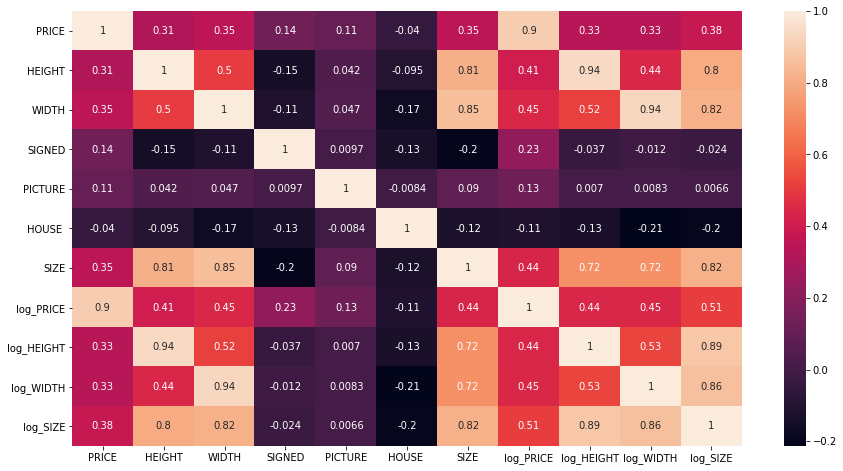

In [ ]:
# Finding correlation between the variables

fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(monet.corr(), annot=True)

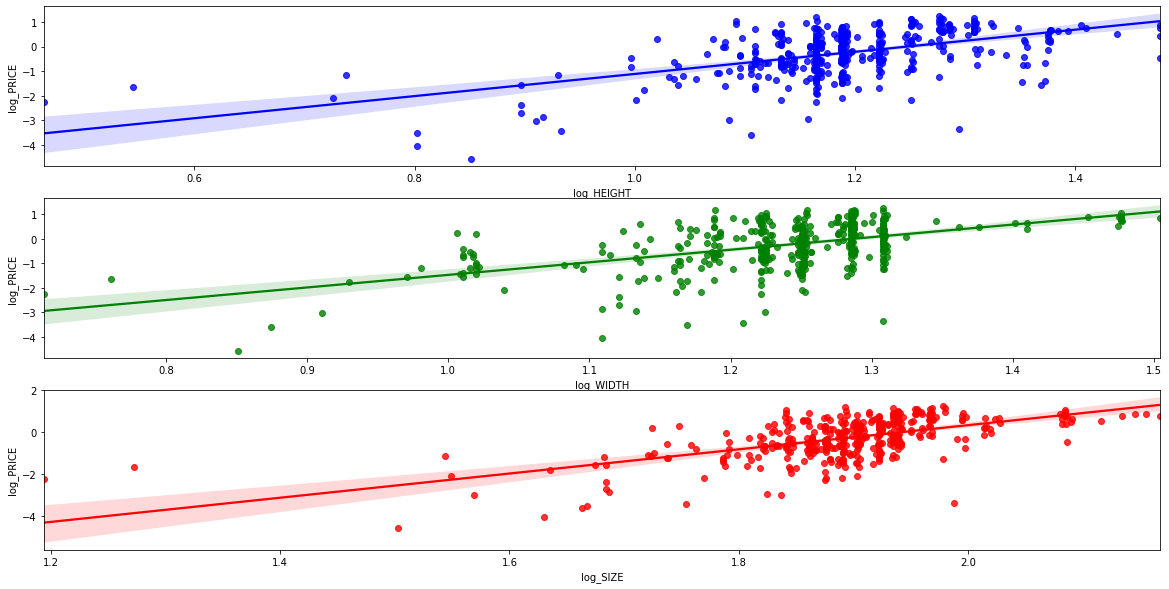

In [ ]:
# We can check this more clearly by using scatter plot
# Before plotting we will convert numerical features into their respective log normal values
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=1, figsize=(20,10))
sns.regplot(x='log_HEIGHT',y='log_PRICE',data=monet.apply(np.log), scatter=True, fit_reg=True, ax=ax1, color='blue')
sns.regplot(x='log_WIDTH',y='log_PRICE',data=monet.apply(np.log), scatter=True, fit_reg=True, ax=ax2, color='green')
sns.regplot(x='log_SIZE',y='log_PRICE',data=monet.apply(np.log), scatter=True, fit_reg=True, ax=ax3, color='red')

In [ ]:
# Simple Linear Regression model 1

X = monet[['log_SIZE']].values
y= monet['log_PRICE'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
lr_model1 = linear_model.LinearRegression()
lr_model1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = lr_model1.predict(X_test)

In [ ]:
price_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
price_df

,Actual Price,Predicted Price
0,0.646056,1.203436
1,0.634458,0.602181
2,0.566889,1.193089
3,0.301585,0.702747
4,1.556564,1.151670
...,...,...
81,0.871553,1.004020
82,0.253479,0.866941
83,0.911278,1.070017
84,2.144721,1.150265


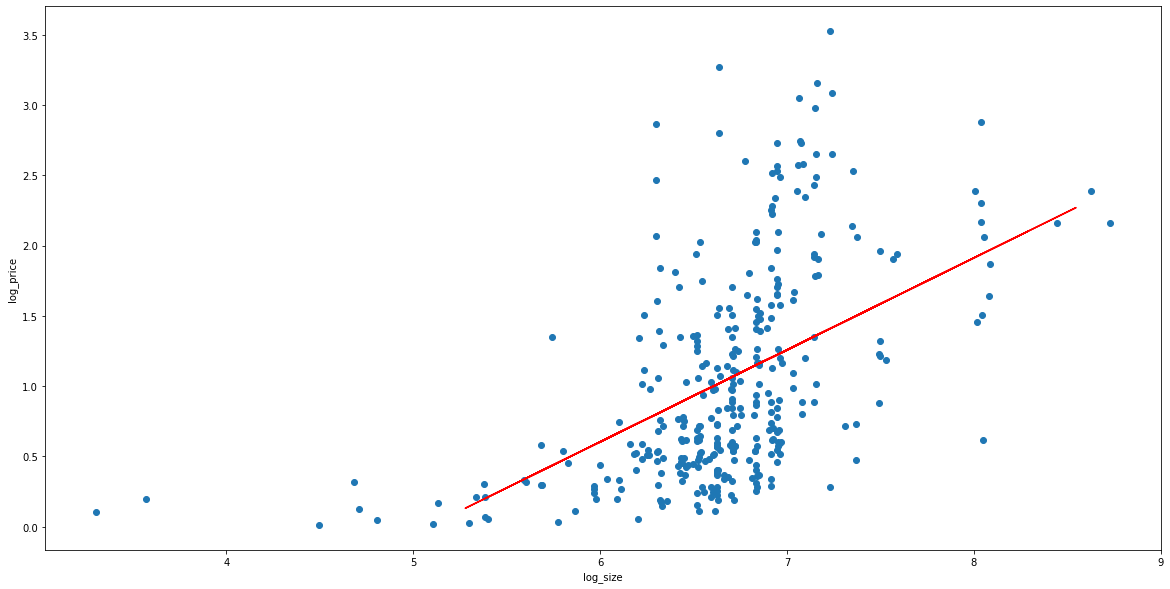

In [ ]:
# Linear Regression plot for this model 1
fig, ax = plt.subplots(figsize=(20,10))
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, color = 'red')
plt.xlabel("log_size")
plt.ylabel("log_price")
plt.show()

In [ ]:
# Checking the accuracy of the model using Loss functions
# Mean Square Error/Quadratic Loss/L2 Loss

root_mean_square_error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(root_mean_square_error)

0.6998650923682143


In [ ]:
# Mean Absolute Error/L1 Loss

mean_absolute_error = metrics.mean_absolute_error(y_test, y_pred)
print(mean_absolute_error)

0.5640666351807583


In [ ]:
# Simple Linear Regression model 2

X = monet[['log_WIDTH']].values
y= monet['log_PRICE'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
lr_model2 = linear_model.LinearRegression()
lr_model2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = lr_model1.predict(X_test)

In [ ]:
price_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
price_df

,Actual Price,Predicted Price
0,0.646056,-0.902487
1,0.634458,-1.103808
2,0.566889,-0.951226
3,0.301585,-1.195918
4,1.556564,-0.952973
...,...,...
81,0.871553,-1.044859
82,0.253479,-1.103808
83,0.911278,-1.034869
84,2.144721,-0.902487


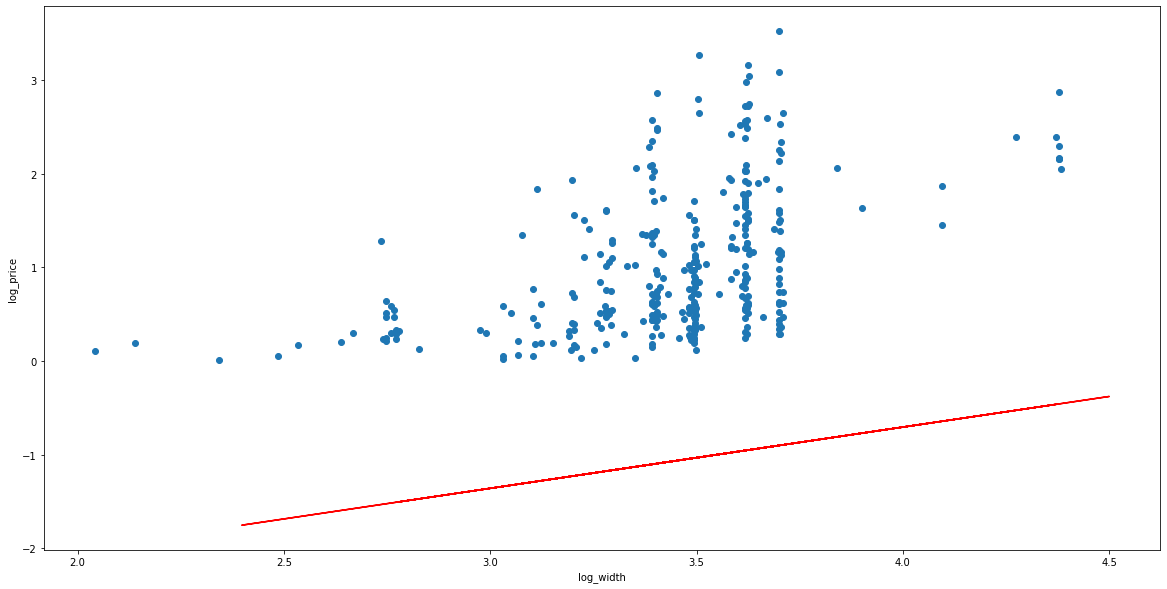

In [ ]:
# Linear Regression plot for this model 2
fig, ax = plt.subplots(figsize=(20,10))
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, color = 'red')
plt.xlabel("log_width")
plt.ylabel("log_price")
plt.show()

In [ ]:
root_mean_square_error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(root_mean_square_error)

2.315965393171512


In [ ]:
# Mean Absolute Error/L1 Loss

mean_absolute_error = metrics.mean_absolute_error(y_test, y_pred)
print(mean_absolute_error)

2.191430894565011


In [ ]:
# Multiple Linear Regression model 3


X = monet[['log_WIDTH', 'log_HEIGHT','log_SIZE','SIGNED','PICTURE', 'HOUSE ']].values
y= monet['log_PRICE'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
lr_model3 = linear_model.LinearRegression()
lr_model3.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = lr_model3.predict(X_test)

In [ ]:
price_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
price_df

,Actual Price,Predicted Price
0,0.646056,1.267874
1,0.634458,0.725654
2,0.566889,1.158556
3,0.301585,0.656954
4,1.556564,1.143483
...,...,...
81,0.871553,0.966176
82,0.253479,0.360580
83,0.911278,1.009573
84,2.144721,1.398654


In [ ]:
root_mean_square_error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(root_mean_square_error)

0.6659217596868569


In [ ]:
mean_absolute_error = metrics.mean_absolute_error(y_test, y_pred)
print(mean_absolute_error)

0.5247231807781941
